In [ ]:
'''Analyses the user traits of the big-5'''

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def readDataFromCsv(file):
    print ("Reading the file from: ",file)
    df = pd.read_csv(file,index_col=False,encoding= "ISO-8859-1")
    return df

def joinDataset(df1, df2, left_keys, right_keys):
    import pandas as pd
    df_result= pd.merge(df1, df2, left_on=left_keys, right_on=right_keys)
    print("Join operation successful !")
    return df_result

def deleteColumns(df,columns):
    df.drop(columns, axis=1)
    


Reading the file from:  ../datasets/rawData.firstTry/UserTraits_study1.csv
Reading the file from:  ../datasets/rawData.firstTry/UserTraits_study2.csv
['w' 'm']


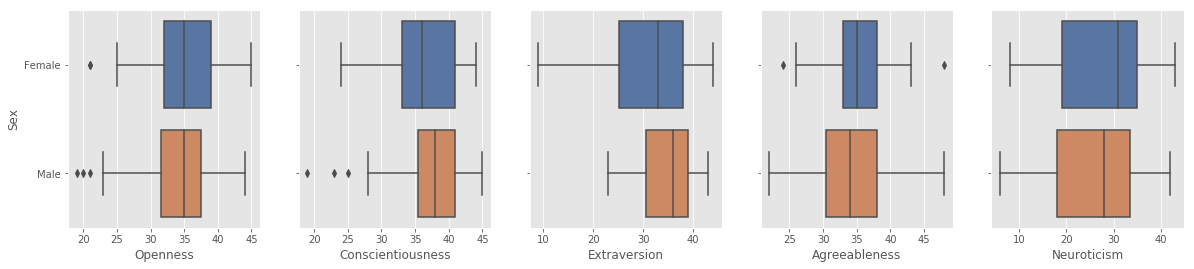

In [62]:
'''Analysis of user traits from study1 and study2 data'''
df_userTraits_1 = readDataFromCsv("../datasets/rawData.firstTry/UserTraits_study1.csv")
df_userTraits_2  = readDataFromCsv("../datasets/rawData.firstTry/UserTraits_study2.csv")
df_userTraits_1 = df_userTraits_1.rename(columns={'user_id':'UserId'})
print(df_userTraits_1['sex'].unique())
df_userTraits_1['sex'] = df_userTraits_1['sex'].map({'w': 'F', 'm': 'M'})
# df_userTraits_2[['UserId','Neuroticism', 'Extraversion', 
#                                            'Openness', 'Agreeableness', 'Conscientiousness']]
df = pd.concat([df_userTraits_1[['UserId','sex','Neuroticism', 'Extraversion', 
                                           'Openness', 'Agreeableness', 'Conscientiousness']],
df_userTraits_2[['UserId','sex' ,'Neuroticism','Extraversion', 
                                           'Openness', 'Agreeableness', 'Conscientiousness']]]
            )
# df_userTraits_1.columns

# sns.set_palette(sns.color_palette("deep", 10))
colors = ["#e74c3c","#9b59b6", "#3498db", "#95a5a6",  "#34495e", "#2ecc71"]
# colors = ["blue", "amber", "greyish", "faded green", "dusty purple"]
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(20,4),sharey=True)
# plt.subplot(number_of_rows + 1,4,i+1) 
sns.boxplot(x = "Openness",y='sex',ax=ax1, data = df
           )
sns.boxplot(x= "Conscientiousness",y='sex',ax=ax2, data = df
           )
sns.boxplot(x= "Extraversion",y='sex',ax=ax3, data = df
           )
sns.boxplot(x ="Agreeableness",y='sex',ax=ax4, data = df)
sns.boxplot(x = "Neuroticism",y='sex',ax=ax5, data = df
           )
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')
ax1.set_ylabel('Sex')
ax1.set_yticklabels(['Female','Male'])
# fig.suptitle('Analysis of user traits')
fig.savefig('Figures/user_traits_range.png')

Reading the file from:  ../datasets/rawData.firstTry/UserTraits_study1.csv
Index(['Unnamed: 0', 'VP', 'age', 'sex', 'occupation', 'graduation', 'ownsSmartphone', 'SmartphoneUsageFrequency', 'SmartphoneType', 'ownsTablet', 'TabletUsageFrequency', 'TabletType', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'user_id'], dtype='object')


,Unnamed: 0,VP,age,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,user_id
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,18.000000,18.000000,27.935484,18.516129,26.519062,30.478006,31.480938,32.217009,115.000000
std,9.092121,9.092121,3.650895,8.744030,5.264581,7.135947,4.895953,5.570964,9.092121
min,3.000000,3.000000,20.000000,6.000000,9.000000,19.000000,22.000000,19.000000,100.000000
25%,10.500000,10.500000,26.500000,12.000000,24.000000,25.000000,27.000000,28.000000,107.500000
50%,18.000000,18.000000,28.000000,16.000000,26.000000,30.545455,32.000000,33.000000,115.000000
75%,25.500000,25.500000,30.000000,24.000000,29.000000,34.500000,35.000000,36.000000,122.500000
max,33.000000,33.000000,36.000000,36.000000,37.000000,45.000000,39.000000,43.000000,130.000000


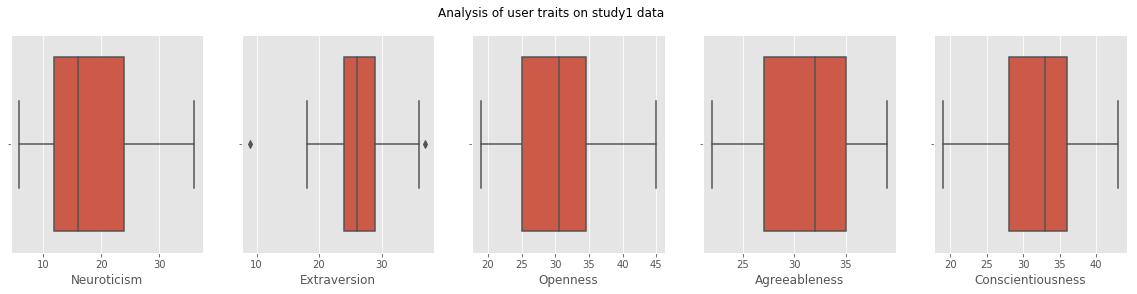

In [17]:
'''Analysis of the user traits of study1 data'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_userTraits = readDataFromCsv("../datasets/rawData.firstTry/UserTraits_study1.csv")
print(df_userTraits.columns)
# print()
df_userTraits.head()
#ratings are given between 2.50 to 6
# average being 4.75
# lowest is 6  and 3.25
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(20,4))
# plt.subplot(number_of_rows + 1,4,i+1) 
sns.boxplot(df_userTraits["Neuroticism"],ax=ax1,#color='green'
           )
sns.boxplot(df_userTraits["Extraversion"],ax=ax2,#color='red'
           )
sns.boxplot(df_userTraits["Openness"],ax=ax3,#color='yellow'
           )
sns.boxplot(df_userTraits["Agreeableness"],ax=ax4)
sns.boxplot(df_userTraits["Conscientiousness"],ax=ax5,#color='grey'
           )
fig.suptitle('Analysis of user traits on study1 data')
fig.savefig('Figures/user_traits_study1_range.png')
# sns.boxplot(x='App',y="ATT", hue='Cond',data=df_uxratings,ax=ax2)
# sns.boxplot(x='App',y="HQ",hue='Cond',data=df_uxratings,ax=ax3)
# fig,ax1=plt.subplots(1,1,figsize=(20,4))
# sns.distplot(df_uxratings['PQ'],kde=True,hist=False,label='PQ',ax=ax1) 
# sns.distplot(df_uxratings['ATT'],kde=True,hist=False,label='ATT',ax=ax1)
# sns.distplot(df_uxratings['HQ'],kde=True,hist=False,label='HQ',ax=ax1)
df_userTraits.describe()

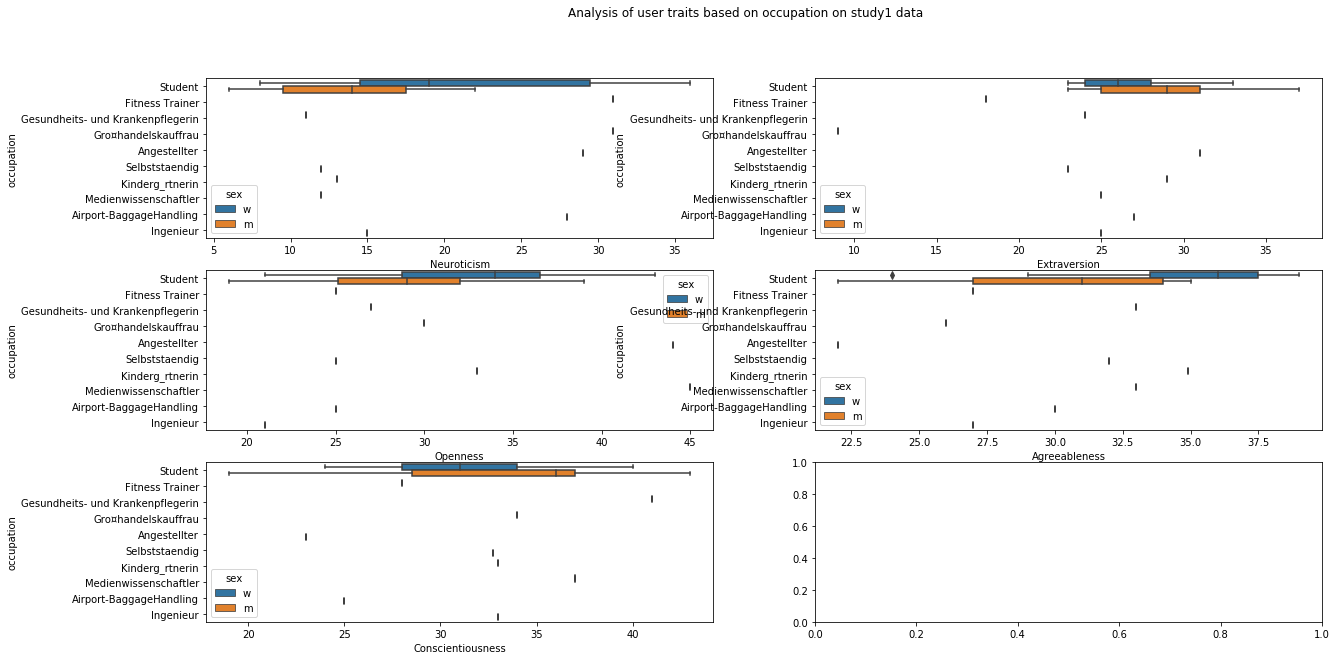

In [34]:
fig,(ax)=plt.subplots(3,2,figsize=(20,10))
# plt.subplot(number_of_rows + 1,4,i+1) 
sns.boxplot(x="Neuroticism",y='occupation',hue='sex',data =df_userTraits, ax=ax[0][0])
sns.boxplot(x="Extraversion",y='occupation',hue='sex',data =df_userTraits, ax=ax[0][1])
sns.boxplot(x="Openness",y='occupation',hue='sex',data =df_userTraits, ax=ax[1][0])
sns.boxplot(x="Agreeableness",y='occupation',hue='sex',data =df_userTraits, ax=ax[1][1])
sns.boxplot(x="Conscientiousness",y='occupation',hue='sex',data =df_userTraits, ax=ax[2][0])
fig.suptitle('Analysis of user traits based on occupation on study1 data')
fig.savefig('Figures/user_traits_study1_based_on_occupation.png')

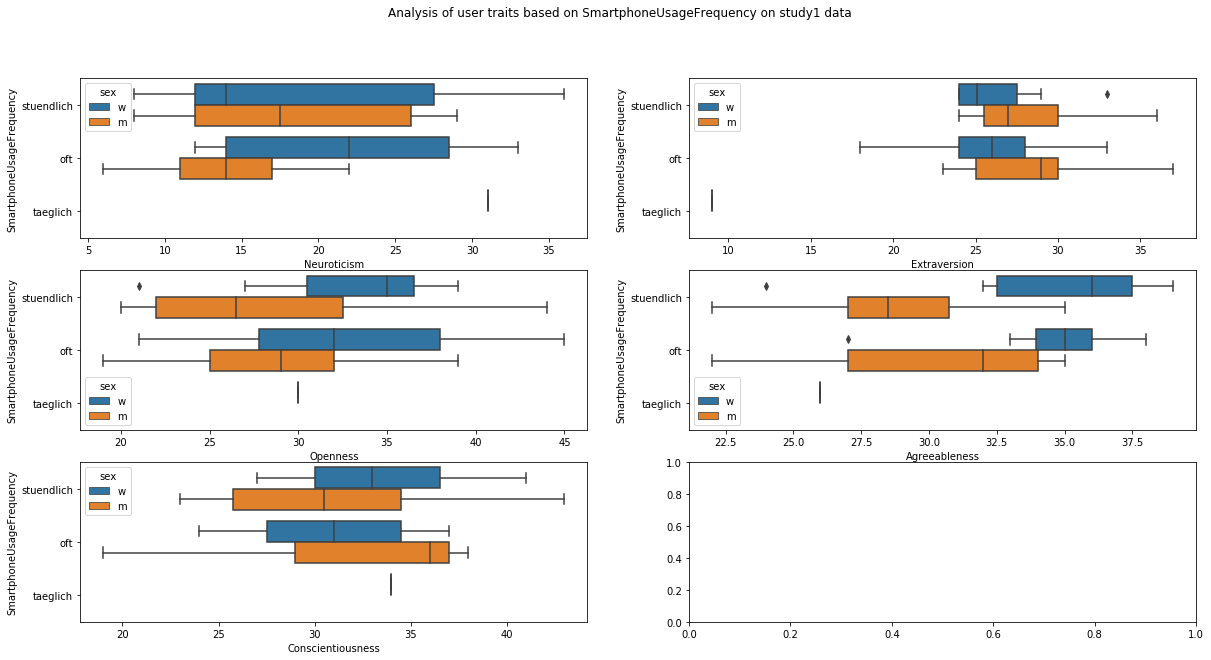

In [36]:
fig,(ax)=plt.subplots(3,2,figsize=(20,10))
# plt.subplot(number_of_rows + 1,4,i+1) 
sns.boxplot(x="Neuroticism",y='SmartphoneUsageFrequency',hue='sex',data =df_userTraits, ax=ax[0][0])
sns.boxplot(x="Extraversion",y='SmartphoneUsageFrequency',hue='sex',data =df_userTraits, ax=ax[0][1])
sns.boxplot(x="Openness",y='SmartphoneUsageFrequency',hue='sex',data =df_userTraits, ax=ax[1][0])
sns.boxplot(x="Agreeableness",y='SmartphoneUsageFrequency',hue='sex',data =df_userTraits, ax=ax[1][1])
sns.boxplot(x="Conscientiousness",y='SmartphoneUsageFrequency',hue='sex',data =df_userTraits, ax=ax[2][0])
fig.suptitle('Analysis of user traits based on SmartphoneUsageFrequency on study1 data')
fig.savefig('Figures/user_traits_study1_based_on_SmartphoneUsageFrequency.png')

Reading the file from:  ../datasets/rawData.firstTry/UserTraits_study2.csv
Index(['Unnamed: 0', 'UserId', 'VP', 'Age', 'Genre', 'Education_Level', 'Handedness', 'Handedness_Cmd', 'Handedness_Score', 'Glasses wearer', 'Injury', 'Has a Smartphone', 'How often use SP', 'Hours_of_use_SP', 'Level of expertise', 'Brand S.phone', 'Has a Tablet', 'Brand Tablet', 'How often use T.', 'Hours_of_use_T', 'Level expertise T.', 'Left Hand', 'Right hand', 'Left Hand_1', 'Right Hand', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'sex'], dtype='object')


,Unnamed: 0,UserId,VP,Age,Handedness_Score,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,23.044444,212.644444,633.644444,26.155556,3.222222,32.333333,37.511111,36.622222,37.066667,39.800000
std,13.209768,13.484259,13.484259,4.805090,8.404244,5.147815,3.086792,3.024813,4.619130,3.293244
min,1.000000,190.000000,611.000000,18.000000,-10.000000,18.000000,31.000000,28.000000,29.000000,32.000000
25%,12.000000,201.000000,622.000000,23.000000,-6.000000,28.000000,35.000000,35.000000,34.000000,38.000000
50%,23.000000,212.000000,633.000000,26.000000,8.000000,33.000000,38.000000,37.000000,37.000000,41.000000
75%,34.000000,224.000000,645.000000,30.000000,10.000000,36.000000,40.000000,38.000000,40.000000,42.000000
max,46.000000,236.000000,657.000000,40.000000,10.000000,43.000000,44.000000,43.000000,48.000000,45.000000


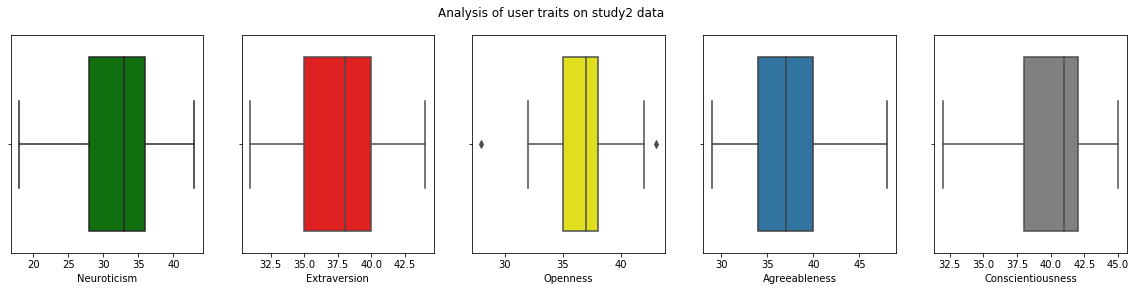

In [9]:
'''Analysis of the user traits of study2 data'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_userTraits = readDataFromCsv("../datasets/rawData.firstTry/UserTraits_study2.csv")
print(df_userTraits.columns)
df_userTraits.head()
#ratings are given between 2.50 to 6
# average being 4.75
# lowest is 6  and 3.25
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(20,4))
# plt.subplot(number_of_rows + 1,4,i+1) 
sns.boxplot(df_userTraits["Neuroticism"],ax=ax1,color='green')
sns.boxplot(df_userTraits["Extraversion"],ax=ax2,color='red')
sns.boxplot(df_userTraits["Openness"],ax=ax3,color='yellow')
sns.boxplot(df_userTraits["Agreeableness"],ax=ax4)
sns.boxplot(df_userTraits["Conscientiousness"],ax=ax5,color='grey')
fig.suptitle('Analysis of user traits on study2 data')
fig.savefig('Figures/user_traits_study2_range.png')
# sns.boxplot(x='App',y="ATT", hue='Cond',data=df_uxratings,ax=ax2)
# sns.boxplot(x='App',y="HQ",hue='Cond',data=df_uxratings,ax=ax3)
# fig,ax1=plt.subplots(1,1,figsize=(20,4))
# sns.distplot(df_uxratings['PQ'],kde=True,hist=False,label='PQ',ax=ax1) 
# sns.distplot(df_uxratings['ATT'],kde=True,hist=False,label='ATT',ax=ax1)
# sns.distplot(df_uxratings['HQ'],kde=True,hist=False,label='HQ',ax=ax1)
df_userTraits.describe()

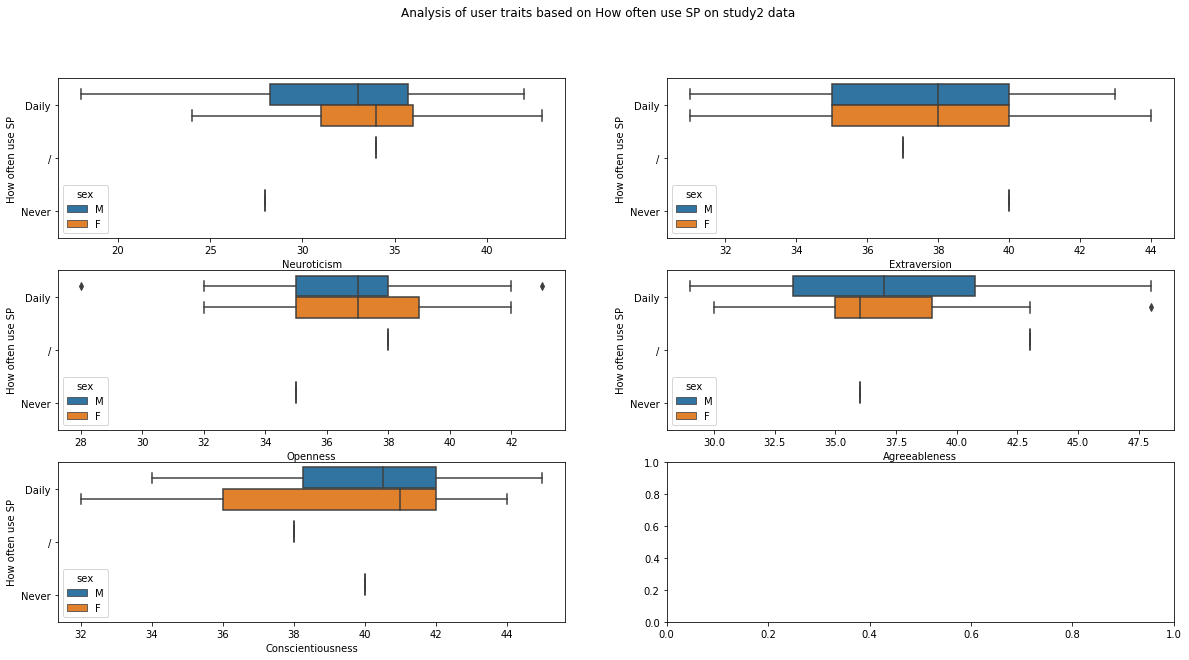

In [39]:
fig,(ax)=plt.subplots(3,2,figsize=(20,10))
# plt.subplot(number_of_rows + 1,4,i+1) 
sns.boxplot(x="Neuroticism",y='How often use SP',hue='sex',data =df_userTraits, ax=ax[0][0])
sns.boxplot(x="Extraversion",y='How often use SP',hue='sex',data =df_userTraits, ax=ax[0][1])
sns.boxplot(x="Openness",y='How often use SP',hue='sex',data =df_userTraits, ax=ax[1][0])
sns.boxplot(x="Agreeableness",y='How often use SP',hue='sex',data =df_userTraits, ax=ax[1][1])
sns.boxplot(x="Conscientiousness",y='How often use SP',hue='sex',data =df_userTraits, ax=ax[2][0])
fig.suptitle('Analysis of user traits based on How often use SP on study2 data')
fig.savefig('Figures/user_traits_study2_based_on_How often use SP.png')

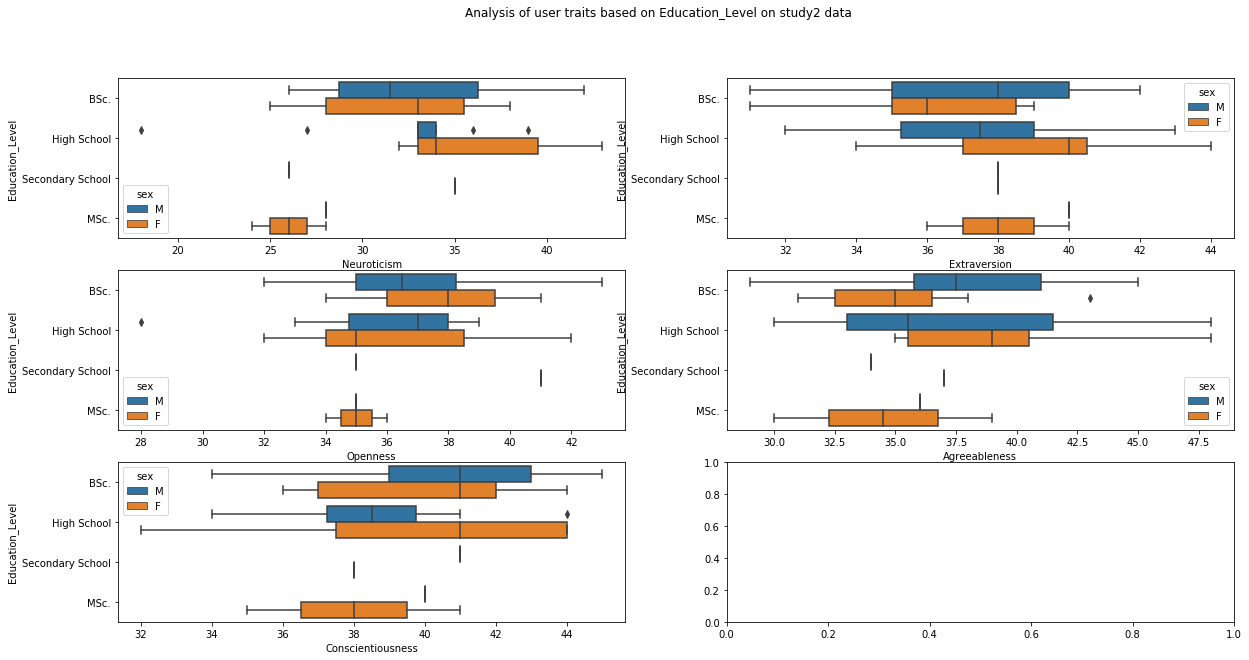

In [40]:
fig,(ax)=plt.subplots(3,2,figsize=(20,10))
# plt.subplot(number_of_rows + 1,4,i+1) 
sns.boxplot(x="Neuroticism",y='Education_Level',hue='sex',data =df_userTraits, ax=ax[0][0])
sns.boxplot(x="Extraversion",y='Education_Level',hue='sex',data =df_userTraits, ax=ax[0][1])
sns.boxplot(x="Openness",y='Education_Level',hue='sex',data =df_userTraits, ax=ax[1][0])
sns.boxplot(x="Agreeableness",y='Education_Level',hue='sex',data =df_userTraits, ax=ax[1][1])
sns.boxplot(x="Conscientiousness",y='Education_Level',hue='sex',data =df_userTraits, ax=ax[2][0])
fig.suptitle('Analysis of user traits based on Education_Level on study2 data')
fig.savefig('Figures/user_traits_study2_based_on_Education_Level.png')

In [33]:
df_userTraits = readDataFromCsv("../datasets/rawData.firstTry/UserTraits_study2.csv")
df = pd.read_csv("../datasets/files_generated/study2_cleandata.csv")
df_ux = readDataFromCsv("../datasets/rawData.firstTry/UXRatings_study2.csv")
df_ux.shape

Reading the file from:  ../datasets/rawData.firstTry/UserTraits_study2.csv
Reading the file from:  ../datasets/rawData.firstTry/UXRatings_study2.csv


(588, 27)

In [36]:
user_id_traits= list(df_userTraits.UserId.unique())
original_user_id = list(df.user_id.unique())
user_id_ux= list(df_ux.UserId.unique())
user_id_ux
list(set(original_user_id) - set(user_id_traits))
# len(user_id_ux)
# original_user_id
# len(user_id_traits)

[194, 234, 204, 237, 238, 239, 240]